Perform hierarchical clustering such as Agglomerative algorithm and Divisive algorithm to group several vehicles. Utilize single, complete, and average linkage to define the cluster. Also draw the dendrogram for this problem.


In [1]:
from google.colab import files
uploaded = files.upload()

Saving Vehicle.csv to Vehicle.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as hierarchy
from sklearn.impute import SimpleImputer

In [4]:
df = pd.read_csv("Vehicle.csv")
df.replace('$null$', np.nan, inplace=True)
df_features = df.drop(['manufact', 'model'], axis=1).apply(pd.to_numeric, errors='coerce')

In [5]:
features_imputed = SimpleImputer(strategy='mean').fit_transform(df_features)
X_scaled = StandardScaler().fit_transform(features_imputed)

In [6]:
linkage_types = ['single', 'complete', 'average']

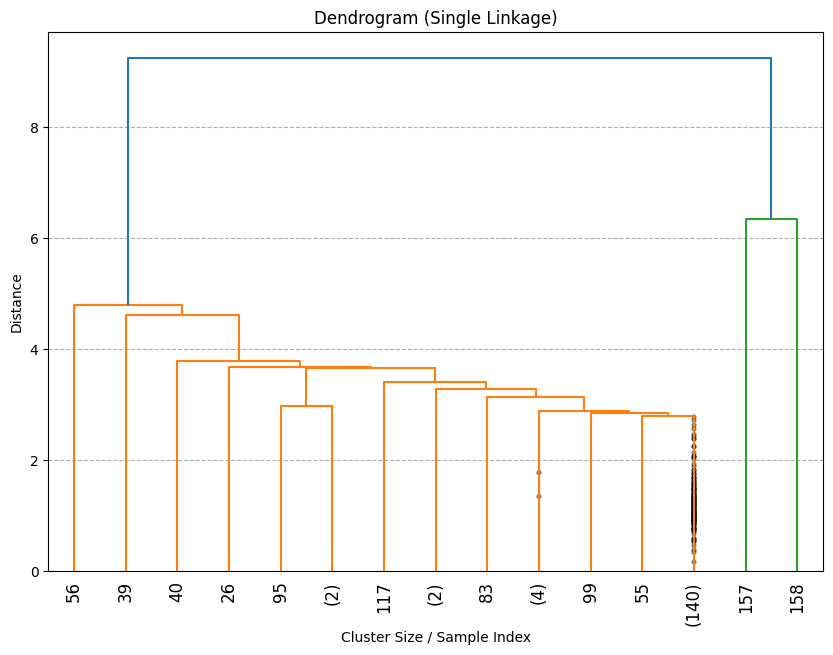

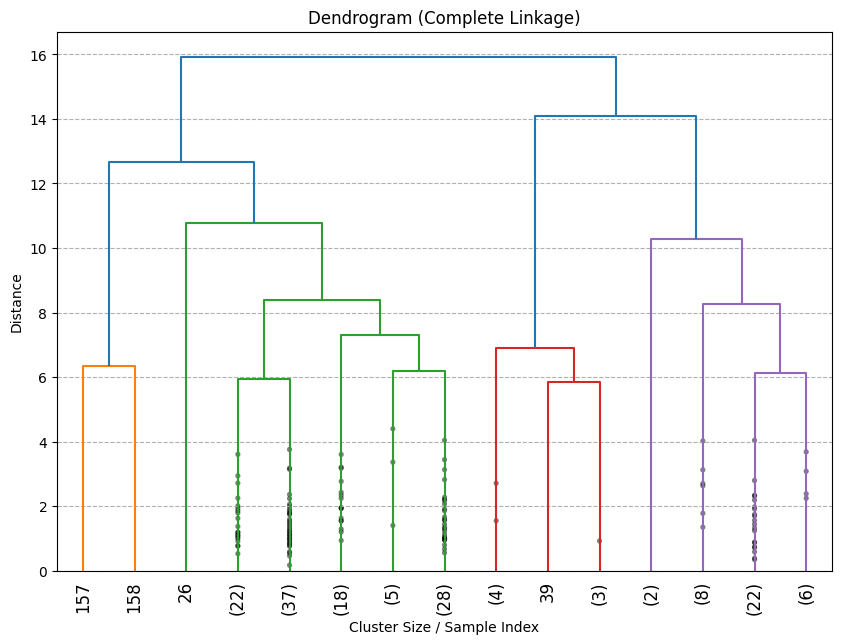

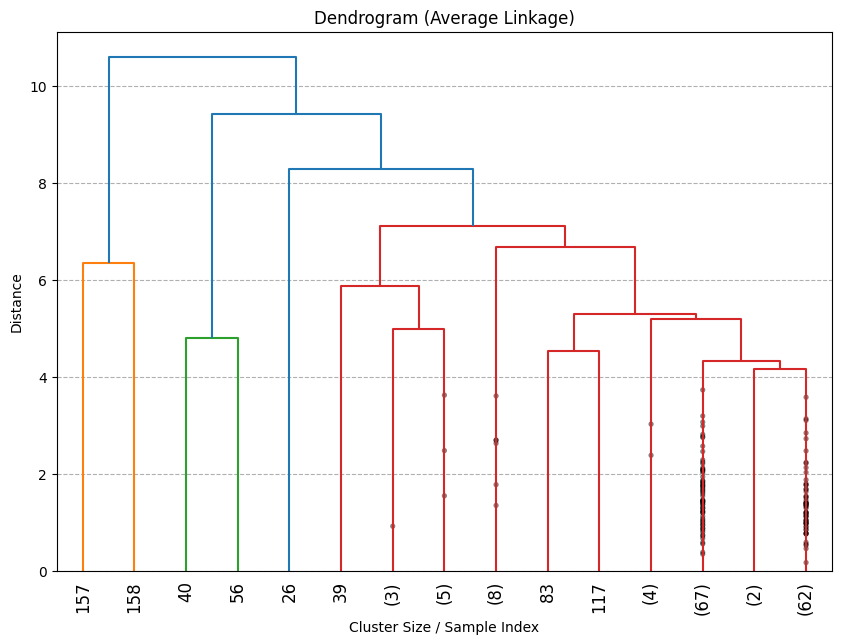

In [10]:
for link_type in linkage_types:
    Z = hierarchy.linkage(X_scaled, method=link_type)

    plt.figure(figsize=(10, 7))
    hierarchy.dendrogram(
        Z,
        truncate_mode='lastp',  # Show only the last p merged clusters
        p=15,                 # p=15
        leaf_rotation=90.,
        show_contracted=True  # to get a nicely compressed plot
    )
    plt.title(f'Dendrogram ({link_type.capitalize()} Linkage)')
    plt.xlabel('Cluster Size / Sample Index')
    plt.ylabel('Distance')
    plt.grid(axis='y', linestyle='--')
    plt.savefig(f'dendrogram_{link_type}.png')